Import Packages

In [80]:
# General
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from  sklearn.model_selection import train_test_split
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
# Model
from sklearn.ensemble import RandomForestClassifier
import joblib


Import Dataset

In [81]:
wine_dataset=pd.read_csv('winequality-red.csv')

Getting to know our data
<br>
* Data Read
<br>
* Data Cleaning
<br>
* Data Classification
<br>
* Data Correlation

In [82]:
# shape of data
wine_dataset.shape

(1599, 12)

In [83]:
# first 5 rows of data
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [84]:
# stats of data
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [85]:
# check for null value
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

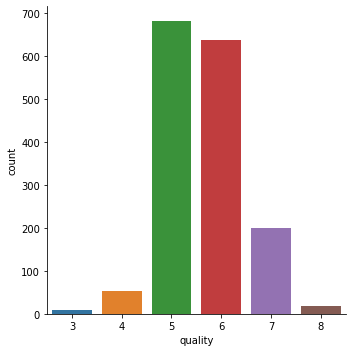

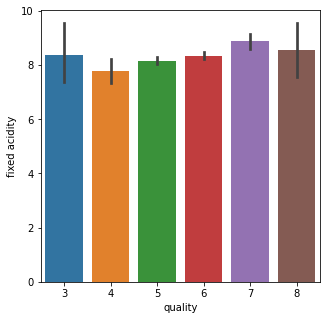

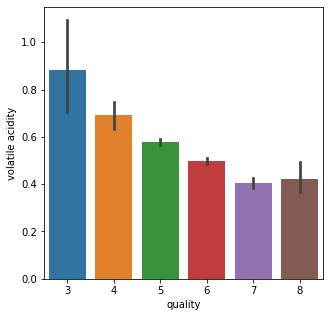

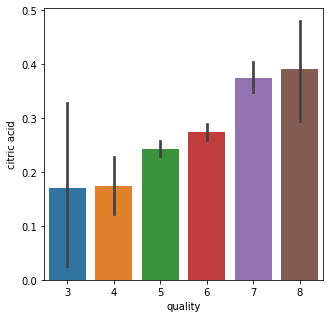

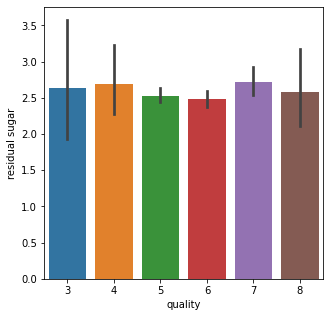

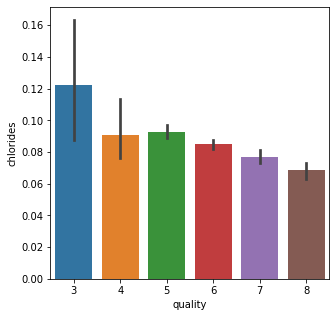

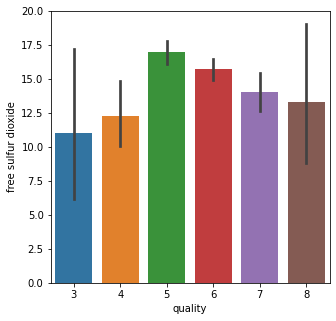

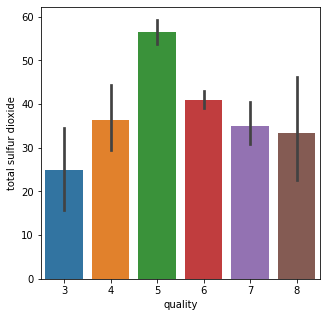

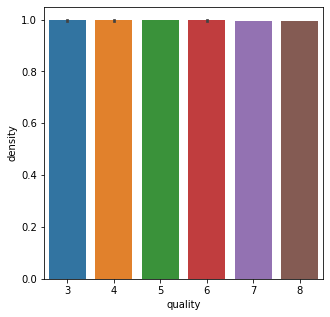

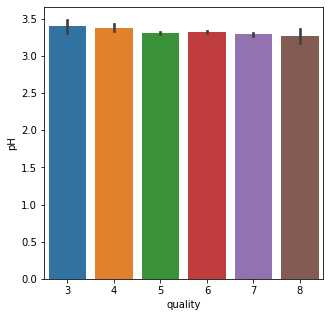

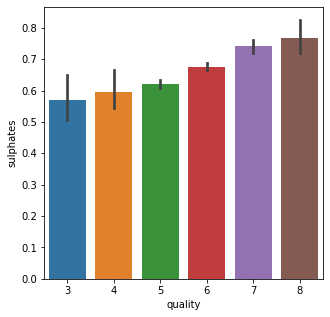

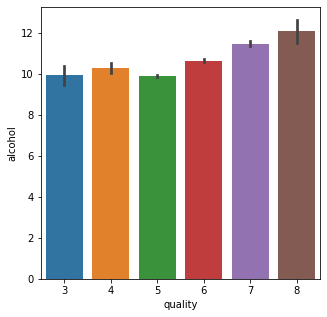

In [86]:
""" 1v1 correlations """
# total spread of quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')
# quality vs fixed acidity
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'fixed acidity', data = wine_dataset)
# quality vs volatile acidity
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)
# quality vs citric acid
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)
# quality vs residual sugar
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'residual sugar', data = wine_dataset)
# quality vs chlorides
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'chlorides', data = wine_dataset)
# quality vs free sulfur dioxide
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'free sulfur dioxide', data = wine_dataset)
# quality vs total sulfur dioxide
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'total sulfur dioxide', data = wine_dataset)
# quality vs density 
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'density', data = wine_dataset)      
# quality vs pH     
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'pH', data = wine_dataset)                  
# quality vs sulphates  
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'sulphates', data = wine_dataset)              
# quality vs alcohol  
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'alcohol', data = wine_dataset)                       

<AxesSubplot:>

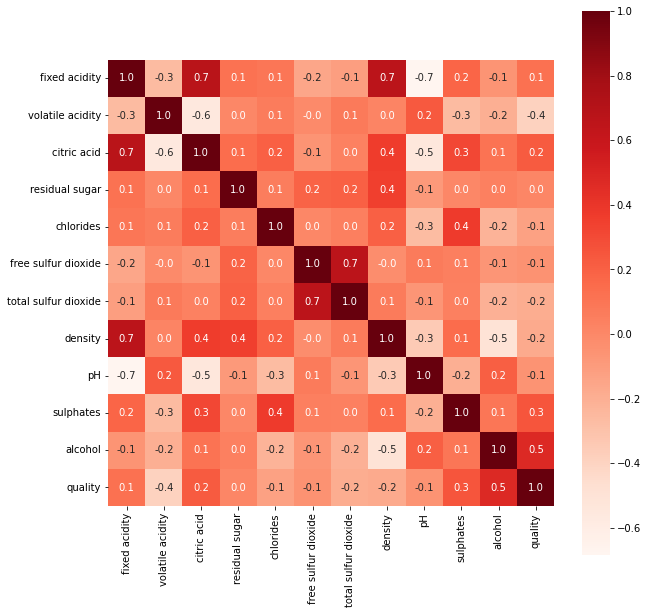

In [87]:
""" heat map correlations """
correlations=wine_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(
  correlations,
  square=True,
  annot=True,
  fmt='.1f',
  cmap='Reds'
)

Data Preprocessing

In [88]:
X=wine_dataset.drop(columns='quality', axis=1)
# wine quality ranges from 3 to 8
# we live divide range from less than of equal to 6 to low quality (0)
# we live divide range from greater than 6 to high quality (1)
Y=wine_dataset['quality'].apply(lambda val: 0 if val<=6 else 1)
print(X.head())
print(Y.head())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
0    0
1

Split data in training and test

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Model training
<br>
* Random forest classifier
![Random forest classifier](https://miro.medium.com/max/1200/1*hmtbIgxoflflJqMJ_UHwXw.jpeg)

[Random forest classifier article by sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [90]:
model=RandomForestClassifier()

In [91]:
model.fit(X_train,Y_train)

RandomForestClassifier()

Model Evaluation

In [92]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data is ', round(100*train_data_accuracy,2),'%')

Accuracy on training data is  100.0 %


In [93]:
# Accuracy on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on testing data is ', round(100*test_data_accuracy,2),'%')

Accuracy on testing data is  92.19 %


In [94]:
# save model
joblib.dump(model,'wine-quality-predictor.joblib')

['wine-quality-predictor.joblib']

Building a predictive system

In [95]:

# input datas
""" 
# low quality

7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8
8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.9976,3.31,0.53,9.2

# high quality

8.9,0.4,0.32,5.6,0.087,10.0,47.0,0.9991,3.38,0.77,10.5
7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8
"""
inputData1=(7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8)
inputData2=(8.9,0.4,0.32,5.6,0.087,10.0,47.0,0.9991,3.38,0.77,10.5)


def predictFromAry(input):
  print()
  # chnage input ary to numpy array
  numpy_array=np.asarray(input)
  # reshape the numpy_input
  reshape_array=numpy_array.reshape(1,-1)
  # load the model
  myModel= joblib.load('wine-quality-predictor.joblib')
  prediction=myModel.predict(reshape_array)
  result=''
  if prediction[0]:
    result='High Quality Wine :)'
  else:
    result='Low Quality Wine :('
  return result

print(predictFromAry(inputData1))
print(predictFromAry(inputData2))

   




0
Low Quality Wine :(

1
High Quality Wine :)


C:\Users\Sohail\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Sohail\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
